공장 생산량과 판매 실적 간의 관계 분석
* 목표:공장별 판매실적 데이터와 차종별 판매실적 데이터를 결합하여, 생산 공장의 효율성과 특정 모델 판매 간의 연관성을 분석.
* 분석 방법:
    * 공장별 생산량이 높은 모델과 실제 판매 실적이 높은 모델 사이의 관계를 탐색합니다.
    * 생산 효율성이 판매 실적으로 어떻게 전환되는지, 혹은 생산 과잉 혹은 부족 현상이 있는지 파악할 수 있어요.

이 분석은 "공장 생산량" 데이터와 "판매 실적" 데이터를 결합해서, 모델별로 생산량이 판매 실적으로 잘 반영되고 있는지, 아니면 과잉·부족 현상이 있는지 파악하는 것입니다.

In [9]:
import pandas as pd

In [10]:
df_factory=pd.read_csv('../../data/전처리 완료/현대_공장별_판매실적.csv')

In [12]:
df_sales=pd.read_csv('../../data/전처리 완료/현대_차종별판매실적.csv')

In [13]:
df_factory

,공장명(국가),차량 모델,판매 구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,HMI,Santro (AH2),내수용,0,0,0,0,0,0,0,0,0,0,0,0,2023
1,HMI,Xcent (BA 4DR),내수용,0,0,0,0,0,0,0,0,0,0,0,0,2023
2,HMI,Aura (AI3 4DR),내수용,4634,5524,3774,5085,4707,4907,4514,4892,3900,4096,3850,3812,2023
3,HMI,NIOS (AI3 5DR),내수용,8760,9635,9304,6839,6385,6321,5337,7306,5223,6552,4708,5247,2023
4,HMI,i20 (BI3 5DR),내수용,8185,9287,6596,6472,6094,6162,5001,4896,6481,7212,5727,4574,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Singapore,IONIQ6 (CE),내수용,9,0,0,0,0,0,0,0,0,0,0,0,2025
387,Singapore,IONIQ5 (NE),수출용,0,0,0,0,0,0,0,0,0,0,0,0,2025
388,Singapore,IONIQ5 Robotaxi (NE R),수출용,0,0,0,0,0,0,0,0,0,0,0,0,2025
389,CKD,PV,합계,4587,0,0,0,0,0,0,0,0,0,0,0,2025


In [14]:
df_sales

,차량 모델,차량 유형,판매 구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Avante (CN7),승용차,내수용,5241.0,5430.0,5466.0,5123.0,5191.0,4556.0,3534.0,4193.0,3739.0,4246.0,4760.0,4196.0,2023
1,Avante (CN7 HEV),승용차,내수용,777.0,827.0,1070.0,120.0,1365.0,742.0,466.0,402.0,407.0,640.0,953.0,794.0,2023
2,Avante (CN7 N),승용차,내수용,82.0,79.0,83.0,35.0,43.0,20.0,2.0,163.0,221.0,131.0,115.0,152.0,2023
3,IONIQ (AE HEV),승용차,내수용,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
4,IONIQ (AE PHEV),승용차,내수용,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,GV70 EV (JK EV),레저용 차량,수출용,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
331,GV80 (JX),레저용 차량,수출용,1984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
332,GV80 Coupe (JX Coupe),레저용 차량,수출용,370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
333,LCV,상용차,수출용,2891.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025


In [15]:
months = [f'{i}월' for i in range(1, 13)]
df_factory['총생산량'] = df_factory[months].sum(axis=1)
# 모델별 총 생산량 집계 (공장별로 여러 행이 있을 수 있으므로)
factory_production = df_factory.groupby('차량 모델')['총생산량'].sum().reset_index()

In [16]:
factory_production

,차량 모델,총생산량
0,Aura (AI3 4DR),82397
1,Celesta (ID),3607
2,Creta (SU2i EV),1735
3,Creta (SU2i LWB),40805
4,Creta (SU2i),361017
...,...,...
111,i10 (AC3),159053
112,i10(AI3v 4DR),1833
113,i10(AI3v 5DR),10623
114,i20 (BC3),214170


In [17]:
df_sales

,차량 모델,차량 유형,판매 구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Avante (CN7),승용차,내수용,5241.0,5430.0,5466.0,5123.0,5191.0,4556.0,3534.0,4193.0,3739.0,4246.0,4760.0,4196.0,2023
1,Avante (CN7 HEV),승용차,내수용,777.0,827.0,1070.0,120.0,1365.0,742.0,466.0,402.0,407.0,640.0,953.0,794.0,2023
2,Avante (CN7 N),승용차,내수용,82.0,79.0,83.0,35.0,43.0,20.0,2.0,163.0,221.0,131.0,115.0,152.0,2023
3,IONIQ (AE HEV),승용차,내수용,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
4,IONIQ (AE PHEV),승용차,내수용,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,GV70 EV (JK EV),레저용 차량,수출용,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
331,GV80 (JX),레저용 차량,수출용,1984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
332,GV80 Coupe (JX Coupe),레저용 차량,수출용,370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
333,LCV,상용차,수출용,2891.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025


In [18]:
# 2. 판매 실적 데이터 로드 및 전처리 (내수/수출 구분 없이 전체 판매로 가정)
df_sales = pd.read_csv("../../data/전처리 완료/현대_차종별판매실적.csv")
df_sales['총판매량'] = df_sales[months].sum(axis=1)
sales_by_model = df_sales.groupby('차량 모델')['총판매량'].sum().reset_index()

In [19]:
sales_by_model

,차량 모델,총판매량
0,Accent (BN7v),9525.0
1,Accent (HCv),3210.0
2,Avante (CN7 HEV),47905.0
3,Avante (CN7 N),7134.0
4,Avante (CN7),239434.0
...,...,...
150,i20 N (BC3 N),4607.0
151,i30 (PD),15279.0
152,i30 (PDe),54835.0
153,i30 (Pde N),5546.0


In [20]:
df_model = pd.merge(factory_production, sales_by_model, on='차량 모델', how='inner')

In [21]:
df_model

,차량 모델,총생산량,총판매량
0,Accent (BN7v),10325,9525.0
1,Accent (HCv),18784,3210.0
2,BHMC,44638,44638.0
3,Bayon (BC3 CUV),126276,55658.0
4,CV,1297,475.0
5,Creta (GSb),21905,9003.0
6,Creta (SU2b),122728,64376.0
7,Creta (SU2id),106234,50670.0
8,Creta (SU2r),0,0.0
9,Creta (SU2v),13605,7749.0


In [22]:
#df_model 총생산량, 총판매량 모두 0인 행 제거
df_model = df_model[(df_model['총생산량'] > 0) & (df_model['총판매량'] > 0)]
df_model

,차량 모델,총생산량,총판매량
0,Accent (BN7v),10325,9525.0
1,Accent (HCv),18784,3210.0
2,BHMC,44638,44638.0
3,Bayon (BC3 CUV),126276,55658.0
4,CV,1297,475.0
5,Creta (GSb),21905,9003.0
6,Creta (SU2b),122728,64376.0
7,Creta (SU2id),106234,50670.0
9,Creta (SU2v),13605,7749.0
11,Elantra (CN7v),3850,1573.0


In [23]:
df_model.to_csv('현대_모델별_생산_판매.csv', index=False)

In [24]:
df_melted = df_model.melt(
    id_vars='차량 모델',
    value_vars=['총생산량', '총판매량'],
    var_name='variable',                # 새로 생성될 열(=어떤 변수인지 표시)
    value_name='value'                  # 실제 수치가 들어갈 열 이름
)

In [25]:
df_melted

,차량 모델,variable,value
0,Accent (BN7v),총생산량,10325.0
1,Accent (HCv),총생산량,18784.0
2,BHMC,총생산량,44638.0
3,Bayon (BC3 CUV),총생산량,126276.0
4,CV,총생산량,1297.0
...,...,...,...
97,i10 (AC3),총판매량,82362.0
98,i10(AI3v 4DR),총판매량,632.0
99,i10(AI3v 5DR),총판매량,4618.0
100,i20 (BC3),총판매량,103033.0


In [26]:
df_pivot = df_melted.pivot(
    index='차량 모델',    # 행: 차량 모델
    columns='variable',   # 열: '총생산량' or '총판매량'
    values='value'        # 값: 실제 수치
)

In [28]:
df_pivot

variable,총생산량,총판매량
차량 모델,,
Accent (BN7v),10325.0,9525.0
Accent (HCv),18784.0,3210.0
BHMC,44638.0,44638.0
Bayon (BC3 CUV),126276.0,55658.0
CV,1297.0,475.0
Creta (GSb),21905.0,9003.0
Creta (SU2b),122728.0,64376.0
Creta (SU2id),106234.0,50670.0
Creta (SU2v),13605.0,7749.0


In [29]:
df_corr = df_pivot.corr()
print(df_corr)

variable      총생산량      총판매량
variable                    
총생산량      1.000000  0.945317
총판매량      0.945317  1.000000


In [30]:
corr_value = df_corr.loc['총생산량', '총판매량']
print("상관계수:", corr_value)

상관계수: 0.9453171833543431


FileNotFoundError: [Errno 2] No such file or directory: '/Users/marurun66/Documents/GitHub/manifest-mini/yeseul/image/모델별 공장 생산량 vs 판매 실적.png'

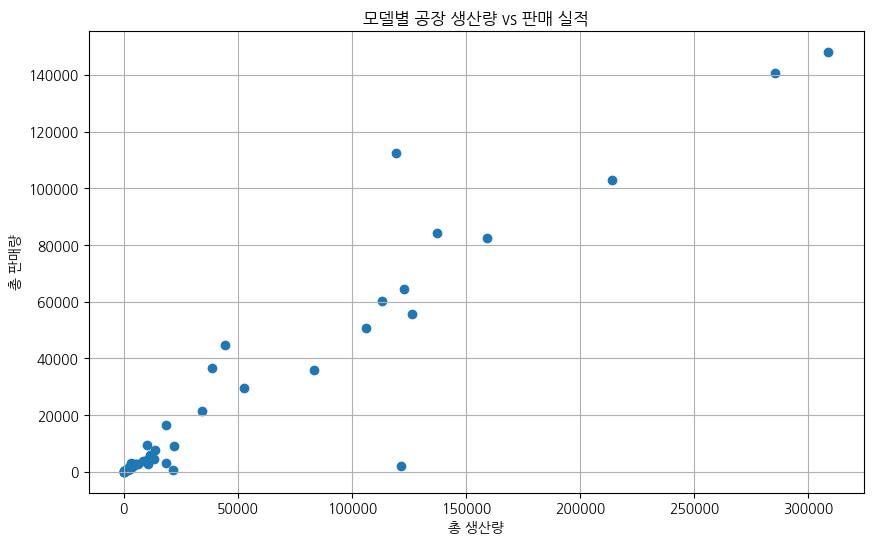

In [31]:
import matplotlib.pyplot as plt
#한글 폰트설정

plt.rc('font', family='NanumGothic')

plt.figure(figsize=(10, 6))
plt.scatter(df_model['총생산량'], df_model['총판매량'])
plt.title("모델별 공장 생산량 vs 판매 실적")
plt.xlabel("총 생산량")
plt.ylabel("총 판매량")
plt.grid(True)
plt.savefig('../image/모델별 공장 생산량 vs 판매 실적.png')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

# 1. “실제 판매량 vs. 회귀선 예측치” 간의 오차(Residual)를 계산
X = df_model['총생산량'].values.reshape(-1, 1)
y = df_model['총판매량'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 2. 잔차(Residual) 계산
df_model.loc[:, '예측치'] = y_pred
df_model.loc[:, '잔차'] = df_model['총판매량'] - df_model['예측치']
df_model.loc[:, '절댓값잔차'] = df_model['잔차'].abs()

# 3. 잔차가 큰 순으로 정렬하여 Outlier 확인
outliers = df_model.sort_values('절댓값잔차', ascending=False).head(5)
print("잔차가 큰 상위 5개 모델:")
print(outliers[['차량 모델', '총생산량', '총판매량', '예측치', '잔차']])


잔차가 큰 상위 5개 모델:
                  차량 모델    총생산량      총판매량           예측치            잔차
43       Santa-Fe (TMa)  121628    2172.0  60770.933462 -58598.933462
40      Santa-Fe (MX5a)  119250  112401.0  59600.841385  52800.158615
2                  BHMC   44638   44638.0  22888.095375  21749.904625
39  Santa-Fe (MX5a HEV)   38813   36488.0  20021.911041  16466.088959
13      Exter (AI3 SUV)  137449   84368.0  68555.637727  15812.362273


/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_66491/1535796240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:, '예측치'] = y_pred
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_66491/1535796240.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:, '잔차'] = df_model['총판매량'] - df_model['예측치']
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_66491/1535796240.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [33]:
df_model['비율'] = df_model['총판매량'] / df_model['총생산량']
df_model.sort_values('비율', ascending=False).head(5)

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_66491/3975824135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['비율'] = df_model['총판매량'] / df_model['총생산량']


,차량 모델,총생산량,총판매량,예측치,잔차,절댓값잔차,비율
2,BHMC,44638,44638.0,22888.095375,21749.904625,21749.904625,1.000000
40,Santa-Fe (MX5a),119250,112401.0,59600.841385,52800.158615,52800.158615,0.942566
39,Santa-Fe (MX5a HEV),38813,36488.0,20021.911041,16466.088959,16466.088959,0.940097
0,Accent (BN7v),10325,9525.0,6004.424466,3520.575534,3520.575534,0.922518
53,Venue (QXv),3463,3164.0,2627.985514,536.014486,536.014486,0.913659


특징	Santa-Fe (TMa) (4세대)	Santa-Fe (MX5a) (5세대)
세대	4세대	5세대
출시 시기	2018년 ~ 2023년	2023년 하반기 ~ 현재
디자인	곡선 위주	각진 형태
플랫폼	이전 세대 플랫폼	현대 N3 플랫폼
실내 공간	상대적으로 작음	넓음
주요 특징	다양한 파워트레인, 첨단 안전/편의 사양	넓은 공간, 최신 기술, 새로운 디자인


Santa-Fe (TMa)의 경우, 내수용 데이터에서는 총판매량이 1935로 나타나고, 해외(외수) 데이터에서는 237로 나타납니다. 이는 해당 모델이 국내 시장에서는 상대적으로 높은 판매량을 기록하지만, 해외에서는 판매량이 매우 낮다는 것을 의미합니다.

이런 결과는 여러 요인에 기인할 수 있어요. 예를 들어:

시장 수요 차이:
해당 모델이 국내에서는 인기가 높거나, 국내 소비자의 선호에 맞는 반면, 해외에서는 수요가 부족할 수 있습니다.

유통 및 마케팅 전략:
내수와 해외의 유통 채널이나 마케팅 전략이 다를 수 있으며, 해외 시장 진출에 어려움이 있거나 현지화가 부족할 수 있습니다.

제품 포지셔닝:
해당 모델이 국내 시장을 중심으로 기획된 제품이라 해외에서의 경쟁력이 떨어질 수도 있습니다.

Santa-Fe (TMa):
데이터에서는 생산량 대비 내수 판매량이 매우 낮게 나타났어요.
예를 들어, 내수에서는 총판매량이 약 1935이고, 해외 판매량은 237로 나타났습니다.

회귀분석 결과에서도 Santa-Fe (TMa)는 예상 판매량에 비해 실제 판매량이 크게 낮아져 잔차가 매우 큰 것으로 보였어요.
이는 이 모델이 시장에서 기대에 못 미치는 성과를 보이고 있음을 시사합니다.

Santa-Fe (MX5a):
반면에 Santa-Fe (MX5a)는 생산량 대비 실제 판매량이 훨씬 높았던 것으로 나타났어요.
데이터상에서 이 모델은 판매 실적이 예측치를 크게 초과하는 양의 잔차를 보였으며, 이는 시장에서 좋은 반응을 얻고 있다는 의미로 해석할 수 있습니다.

선형 회귀 모델을 사용하여, 각 차량 모델의 총생산량이 총판매량에 미치는 영향을 평가하고, 실제 판매량이 모델이 예측한 값과 얼마나 차이가 나는지(잔차)를 계산하는 과정입니다. 왜 선형 회귀 모델을 썼는지 구체적으로 설명드릴게요:

기본 가정 (Linear Relationship)
기본적으로, 생산량이 많으면 판매량도 많을 것이라는 가정을 세울 수 있습니다.
선형 회귀는 두 변수 사이의 직선적(선형) 관계를 추정하는 가장 간단하고 직관적인 방법입니다.

모델 적합 및 예측 (Fitting and Prediction)
총생산량을 독립 변수(X)로, 총판매량을 종속 변수(y)로 하여 선형 모델을 적합시킵니다.
이를 통해 각 차량 모델에 대해 생산량에 따른 예상 판매량(예측치)를 계산합니다.

잔차(Residual) 계산
잔차는 실제 판매량 - 예측 판매량으로 정의됩니다.
잔차가 큰 모델은 모델이 예측한 판매량과 실제 판매량 사이에 큰 차이가 있다는 것을 의미합니다.
이런 큰 차이는 해당 모델이 일반적인 추세와 다르게 행동했거나, 데이터 오류 혹은 특이한 상황(예: 과잉생산, 낮은 시장 수요 등)을 나타낼 수 있습니다.

이상치(Outlier) 탐지
잔차의 절댓값이 큰 순으로 모델들을 정렬하면, 예측과 실제의 차이가 큰 모델(이상치)을 쉽게 확인할 수 있습니다.
이 정보를 바탕으로, 왜 특정 모델이 일반적인 추세에서 벗어나는지를 추가 분석할 수 있습니다.
즉, 선형 회귀 모델은
생산량과 판매량의 기본적인 선형 관계를 이해하고,
그 관계에 크게 벗어나는 모델(예: 잔차가 큰 모델)을 찾아내어,
추가 분석(예: 시장 요인, 생산 효율성, 데이터 문제 등)으로 이어질 수 있도록 하는 기초 탐색 도구로 사용됩니다.